In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Import fashion mnist data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

In [4]:
train_images.shape  #60,000 images with each image having 28 X 28 pixels

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape   #10,000 images with each image having 28 x 28 pixel

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 3. Preprocess the data

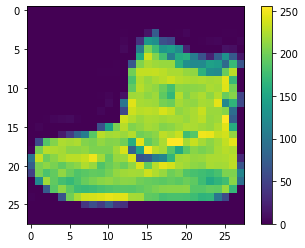

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Preprocess the images
train_images = train_images / 255.0

test_images = test_images / 255.0

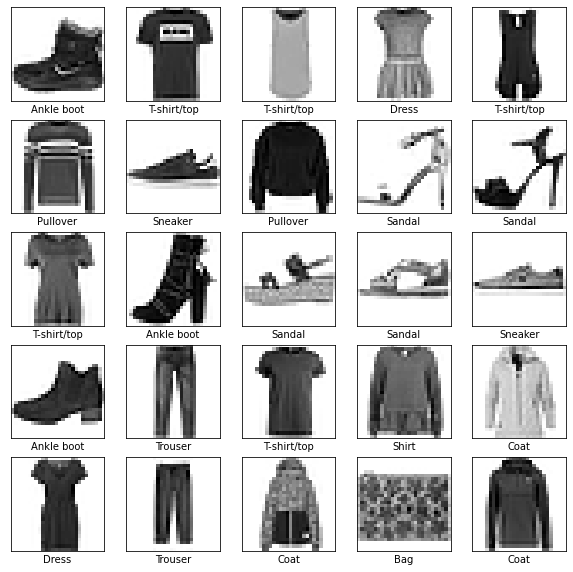

In [11]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

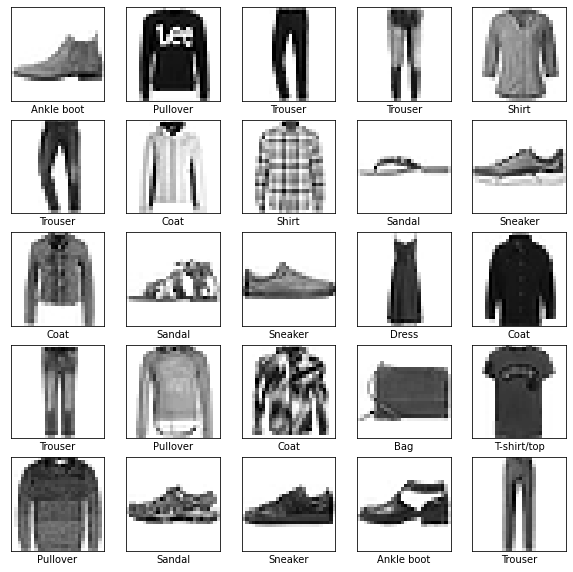

In [12]:
#Display first 25 images from testing set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## 4. Build the model

#### 4.1 Set up the layers

In [13]:
model_rms = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model_nag = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model_adagrad = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model_adadelta = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model_mgd = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### 4.2 Compile the model

##### 4.2.1 RMSProp

In [14]:
model_rms.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### 4.2.2 NAG

In [15]:
model_nag.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### 4.2.3 AdaGrad

In [16]:
model_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### 4.2.4 AdaDelta

In [17]:
model_adadelta.compile(optimizer='adadelta',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### 4.2.5 Adam

In [18]:
model_adam.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### 4.2.6 Momentum gradient descent

In [19]:
model_mgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the Model

#### 5.1 Feed the model

##### 5.1.1 RMSProp

In [20]:
history_rms = model_rms.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 8ms/step - loss: 0.7600 - accuracy: 0.7437
Epoch 2/10
120/120 [==============================] - 1s 8ms/step - loss: 0.5111 - accuracy: 0.8199
Epoch 3/10
120/120 [==============================] - 1s 8ms/step - loss: 0.4481 - accuracy: 0.8434
Epoch 4/10
120/120 [==============================] - 1s 8ms/step - loss: 0.4143 - accuracy: 0.8536
Epoch 5/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3870 - accuracy: 0.8605
Epoch 6/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3665 - accuracy: 0.8688
Epoch 7/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3477 - accuracy: 0.8750
Epoch 8/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3351 - accuracy: 0.8786
Epoch 9/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3234 - accuracy: 0.8835
Epoch 10/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3145 - accuracy: 0.8855

##### 5.1.2 NAG

In [21]:
history_nag = model_nag.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 8ms/step - loss: 0.7181 - accuracy: 0.7611
Epoch 2/10
120/120 [==============================] - 1s 9ms/step - loss: 0.4722 - accuracy: 0.8357
Epoch 3/10
120/120 [==============================] - 1s 9ms/step - loss: 0.4193 - accuracy: 0.8540
Epoch 4/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3906 - accuracy: 0.8623
Epoch 5/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3687 - accuracy: 0.8699
Epoch 6/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3516 - accuracy: 0.8755
Epoch 7/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3381 - accuracy: 0.8796
Epoch 8/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3222 - accuracy: 0.8849
Epoch 9/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3128 - accuracy: 0.8882
Epoch 10/10
120/120 [==============================] - 1s 9ms/step - loss: 0.3046 - accuracy: 0.8899

##### 5.1.3 AdaGrad

In [22]:
history_adagrad = model_adagrad.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 2.0267 - accuracy: 0.3159
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 1.5931 - accuracy: 0.5704
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 1.3464 - accuracy: 0.6283
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 1.1949 - accuracy: 0.6549
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 1.0935 - accuracy: 0.6704
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 1.0204 - accuracy: 0.6829
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 0.9652 - accuracy: 0.6944
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 0.9219 - accuracy: 0.7045
Epoch 9/10
120/120 [==============================] - 1s 7ms/step - loss: 0.8868 - accuracy: 0.7132
Epoch 10/10
120/120 [==============================] - 1s 7ms/step - loss: 0.8576 - accuracy: 0.7232

##### 5.1.4 AdaDelta

In [23]:
history_adadelta = model_adadelta.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 2.4467 - accuracy: 0.0846
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 2.3795 - accuracy: 0.1026
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 2.3150 - accuracy: 0.1250
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 2.2529 - accuracy: 0.1523
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 2.1930 - accuracy: 0.1855
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 2.1350 - accuracy: 0.2268
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 2.0789 - accuracy: 0.2695
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 2.0243 - accuracy: 0.3133
Epoch 9/10
120/120 [==============================] - 1s 7ms/step - loss: 1.9714 - accuracy: 0.3567
Epoch 10/10
120/120 [==============================] - 1s 7ms/step - loss: 1.9206 - accuracy: 0.4016

##### 5.1.5 Adam

In [24]:
history_adam = model_adam.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6991 - accuracy: 0.7658
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 0.4619 - accuracy: 0.8420
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 0.4178 - accuracy: 0.8568
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3916 - accuracy: 0.8649
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3673 - accuracy: 0.8719
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3522 - accuracy: 0.8765
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3391 - accuracy: 0.8805
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3339 - accuracy: 0.8811
Epoch 9/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3179 - accuracy: 0.8867
Epoch 10/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3087 - accuracy: 0.8912

##### 5.1.6 Momentum Gradient Descent

In [25]:
history_mgd = model_mgd.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 1.5609 - accuracy: 0.5362
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 1.0255 - accuracy: 0.6857
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 0.8668 - accuracy: 0.7224
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 0.7852 - accuracy: 0.7483
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 0.7321 - accuracy: 0.7651
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.7756
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6642 - accuracy: 0.7847
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6404 - accuracy: 0.7922
Epoch 9/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6209 - accuracy: 0.7975
Epoch 10/10
120/120 [==============================] - 1s 7ms/step - loss: 0.6045 - accuracy: 0.8023

#### 5.2 Evaluate accuracy

##### 5.2.1 RMSProp

In [26]:
test_loss_rms, test_acc_rms = model_rms.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (RMSProp optimizer):', test_acc_rms)

313/313 - 0s - loss: 0.3658 - accuracy: 0.8657

Test accuracy (RMSProp optimizer): 0.8657000064849854


##### 5.2.2 NAG

In [27]:
test_loss_nag, test_acc_nag = model_nag.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (NAG optimizer):', test_acc_nag)

313/313 - 0s - loss: 0.3591 - accuracy: 0.8721

Test accuracy (NAG optimizer): 0.8720999956130981


##### 5.2.3 AdaGrad

In [28]:
test_loss_adagrad, test_acc_adagrad = model_adagrad.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (AdaGrad optimizer):', test_acc_adagrad)

313/313 - 0s - loss: 0.8597 - accuracy: 0.7127

Test accuracy (AdaGrad optimizer): 0.7127000093460083


##### 5.2.4 AdaDelta

In [29]:
test_loss_adadelta, test_acc_adadelta = model_adadelta.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (AdaDelta optimizer):', test_acc_adadelta)

313/313 - 0s - loss: 1.8975 - accuracy: 0.4203

Test accuracy (AdaDelta optimizer): 0.4203000068664551


##### 5.2.5 Adam

In [30]:
test_loss_adam, test_acc_adam = model_adam.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (Adam optimizer):', test_acc_adam)

313/313 - 0s - loss: 0.3637 - accuracy: 0.8705

Test accuracy (Adam optimizer): 0.8705000281333923


##### 5.2.6 Momentum Gradient Descent

In [31]:
test_loss_mgd, test_acc_mgd = model_mgd.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy (Momentum Gradient Descent optimizer):', test_acc_mgd)

313/313 - 0s - loss: 0.6201 - accuracy: 0.7923

Test accuracy (Momentum Gradient Descent optimizer): 0.7922999858856201


## 6. Accuracy plots

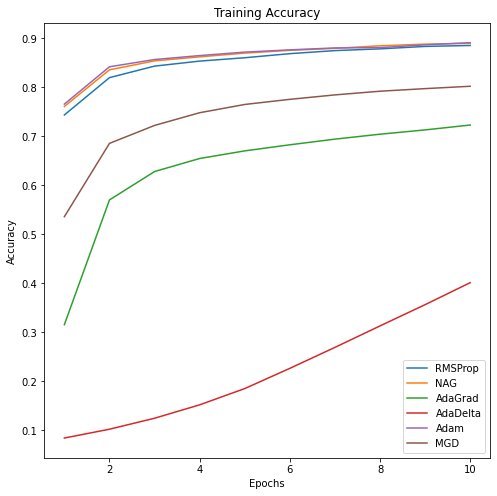

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

train_acc_rms = history_rms.history['accuracy']
train_acc_nag = history_nag.history['accuracy']
train_acc_adagrad = history_adagrad.history['accuracy']
train_acc_adadelta = history_adadelta.history['accuracy']
train_acc_adam = history_adam.history['accuracy']
train_acc_mgd = history_mgd.history['accuracy']


epochs = range(1, len(train_acc_rms) + 1)

plt.figure(figsize=(8,8))

plt.plot(epochs, train_acc_rms, label='RMSProp Accuracy')
plt.plot(epochs, train_acc_nag, label='NAG Accuracy')
plt.plot(epochs, train_acc_adagrad, label='AdaGrad Accuracy')
plt.plot(epochs, train_acc_adadelta, label='AdaDelta Accuracy')
plt.plot(epochs, train_acc_adam, label='Adam Accuracy')
plt.plot(epochs, train_acc_mgd, label='Momentum Gradient Descent Accuracy')


plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['RMSProp', 'NAG', 'AdaGrad', 'AdaDelta', 'Adam', 'MGD'], loc='lower right')
plt.show()